In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

In [ ]:
print(df.head())

                                     RowId  YearStart  YearEnd LocationAbbr  \
0    BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE     2022.0   2022.0           PA   
1    BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE     2022.0   2022.0           SD   
2    BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE     2022.0   2022.0           ID   
3    BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE     2022.0   2022.0           MD   
4  BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER     2022.0   2022.0           WI   

   LocationDesc Datasource          Class                     Topic  \
0  Pennsylvania      BRFSS  Mental Health  Frequent mental distress   
1  South Dakota      BRFSS  Mental Health  Frequent mental distress   
2         Idaho      BRFSS  Mental Health  Frequent mental distress   
3      Maryland      BRFSS  Mental Health  Frequent mental distress   
4     Wisconsin      BRFSS  Mental Health  Frequent mental distress   

                                            Question Data_Value_Unit  ...  \
0  Percentage of olde

# **LIMPIEZA DE DATOS (Imputacion)**

In [ ]:
# Para columnas numéricas
print(df.describe())

# Para columnas categóricas
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Valores únicos en la columna {column}:")
    print(df[column].value_counts())
    print("\n")

          YearStart       YearEnd    Data_Value  Data_Value_Alt  \
count  39183.000000  39183.000000  26464.000000    26464.000000   
mean    2021.750734   2021.995279     40.031503       40.031503   
std        0.708863      0.157514     24.096393       24.096393   
min     2015.000000   2015.000000      0.000000        0.000000   
25%     2022.000000   2022.000000     19.900000       19.900000   
50%     2022.000000   2022.000000     35.200000       35.200000   
75%     2022.000000   2022.000000     60.800000       60.800000   
max     2022.000000   2022.000000    100.000000      100.000000   

       Low_Confidence_Limit  High_Confidence_Limit    LocationID  
count          26438.000000           26438.000000  39183.000000  
mean              34.908756              45.377831    687.569813  
std               23.339595              24.777717   2335.920418  
min                0.000000               1.300000      1.000000  
25%               15.600000              24.400000     18.000

In [ ]:
print(df.dtypes)

RowId                          object
YearStart                     float64
YearEnd                       float64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID  

In [ ]:
# Asegurarse de que los valores sean strings
df['Low_Confidence_Limit'] = df['Low_Confidence_Limit'].astype(str)

# Extraer caracteres no numéricos
non_numeric_chars = df['Low_Confidence_Limit'].str.extract('([^0-9.-])')[0].dropna().unique()

# Imprimir los caracteres no numéricos encontrados
print(non_numeric_chars)

['n']


In [ ]:
# Convertir todos los valores a string para evitar errores con .str
df['Low_Confidence_Limit'] = df['Low_Confidence_Limit'].astype(str)
df['High_Confidence_Limit'] = df['High_Confidence_Limit'].astype(str)

# Verificar si hay valores no numéricos antes de convertir
print("Valores no numéricos en 'Low_Confidence_Limit':")
print(df[~df['Low_Confidence_Limit'].str.replace(',', '').str.match(r'^\d+\.?\d*$')]['Low_Confidence_Limit'].unique())

print("Valores no numéricos en 'High_Confidence_Limit':")
print(df[~df['High_Confidence_Limit'].str.replace(',', '').str.match(r'^\d+\.?\d*$')]['High_Confidence_Limit'].unique())

# Eliminar comas
df['Low_Confidence_Limit'] = df['Low_Confidence_Limit'].str.replace(',', '', regex=False)
df['High_Confidence_Limit'] = df['High_Confidence_Limit'].str.replace(',', '', regex=False)

# Convertir a numérico
df['Low_Confidence_Limit'] = pd.to_numeric(df['Low_Confidence_Limit'], errors='coerce')
df['High_Confidence_Limit'] = pd.to_numeric(df['High_Confidence_Limit'], errors='coerce')

# Verificar si la conversión a numérico produce algún NaN
print("Valores convertidos a NaN en 'Low_Confidence_Limit':")
print(df[df['Low_Confidence_Limit'].isna()]['Low_Confidence_Limit'].unique())

print("Valores convertidos a NaN en 'High_Confidence_Limit':")
print(df[df['High_Confidence_Limit'].isna()]['High_Confidence_Limit'].unique())


Valores no numéricos en 'Low_Confidence_Limit':
['nan']
Valores no numéricos en 'High_Confidence_Limit':
['nan']
Valores convertidos a NaN en 'Low_Confidence_Limit':
[nan]
Valores convertidos a NaN en 'High_Confidence_Limit':
[nan]


In [ ]:
print(df.dtypes)

RowId                          object
YearStart                     float64
YearEnd                       float64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
Geolocation                    object
ClassID                        object
TopicID                        object
QuestionID                     object
LocationID  

In [ ]:
print(df.describe())

          YearStart       YearEnd    Data_Value  Data_Value_Alt  \
count  39183.000000  39183.000000  26464.000000    26464.000000   
mean    2021.750734   2021.995279     40.031503       40.031503   
std        0.708863      0.157514     24.096393       24.096393   
min     2015.000000   2015.000000      0.000000        0.000000   
25%     2022.000000   2022.000000     19.900000       19.900000   
50%     2022.000000   2022.000000     35.200000       35.200000   
75%     2022.000000   2022.000000     60.800000       60.800000   
max     2022.000000   2022.000000    100.000000      100.000000   

       Low_Confidence_Limit  High_Confidence_Limit    LocationID  
count          26438.000000           26438.000000  39183.000000  
mean              34.908756              45.377831    687.569813  
std               23.339595              24.777717   2335.920418  
min                0.000000               1.300000      1.000000  
25%               15.600000              24.400000     18.000

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39184 entries, 0 to 39183
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowId                       39184 non-null  object 
 1   YearStart                   39183 non-null  float64
 2   YearEnd                     39183 non-null  float64
 3   LocationAbbr                39183 non-null  object 
 4   LocationDesc                39183 non-null  object 
 5   Datasource                  39183 non-null  object 
 6   Class                       39183 non-null  object 
 7   Topic                       39183 non-null  object 
 8   Question                    39183 non-null  object 
 9   Data_Value_Unit             39183 non-null  object 
 10  DataValueTypeID             39183 non-null  object 
 11  Data_Value_Type             39183 non-null  object 
 12  Data_Value                  26464 non-null  float64
 13  Data_Value_Alt              264

In [ ]:
print(df.isnull().sum())

RowId                             0
YearStart                         1
YearEnd                           1
LocationAbbr                      1
LocationDesc                      1
Datasource                        1
Class                             1
Topic                             1
Question                          1
Data_Value_Unit                   1
DataValueTypeID                   1
Data_Value_Type                   1
Data_Value                    12720
Data_Value_Alt                12720
Data_Value_Footnote_Symbol    24875
Data_Value_Footnote           24875
Low_Confidence_Limit          12746
High_Confidence_Limit         12746
StratificationCategory1           1
Stratification1                   1
StratificationCategory2        5198
Stratification2                5198
Geolocation                    3688
ClassID                           1
TopicID                           1
QuestionID                        1
LocationID                        1
StratificationCategoryID1   

In [ ]:
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
tamaño = df.shape
print(f"El conjunto de datos tiene {tamaño[0]} filas y {tamaño[1]} columnas.")

El conjunto de datos tiene 39184 filas y 31 columnas.


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

YearStart                         1
YearEnd                           1
LocationAbbr                      1
LocationDesc                      1
Datasource                        1
Class                             1
Topic                             1
Question                          1
Data_Value_Unit                   1
DataValueTypeID                   1
Data_Value_Type                   1
Data_Value                    12720
Data_Value_Alt                12720
Data_Value_Footnote_Symbol    24875
Data_Value_Footnote           24875
Low_Confidence_Limit          12746
High_Confidence_Limit         12746
StratificationCategory1           1
Stratification1                   1
StratificationCategory2        5198
Stratification2                5198
Geolocation                    3688
ClassID                           1
TopicID                           1
QuestionID                        1
LocationID                        1
StratificationCategoryID1         1
StratificationID1           

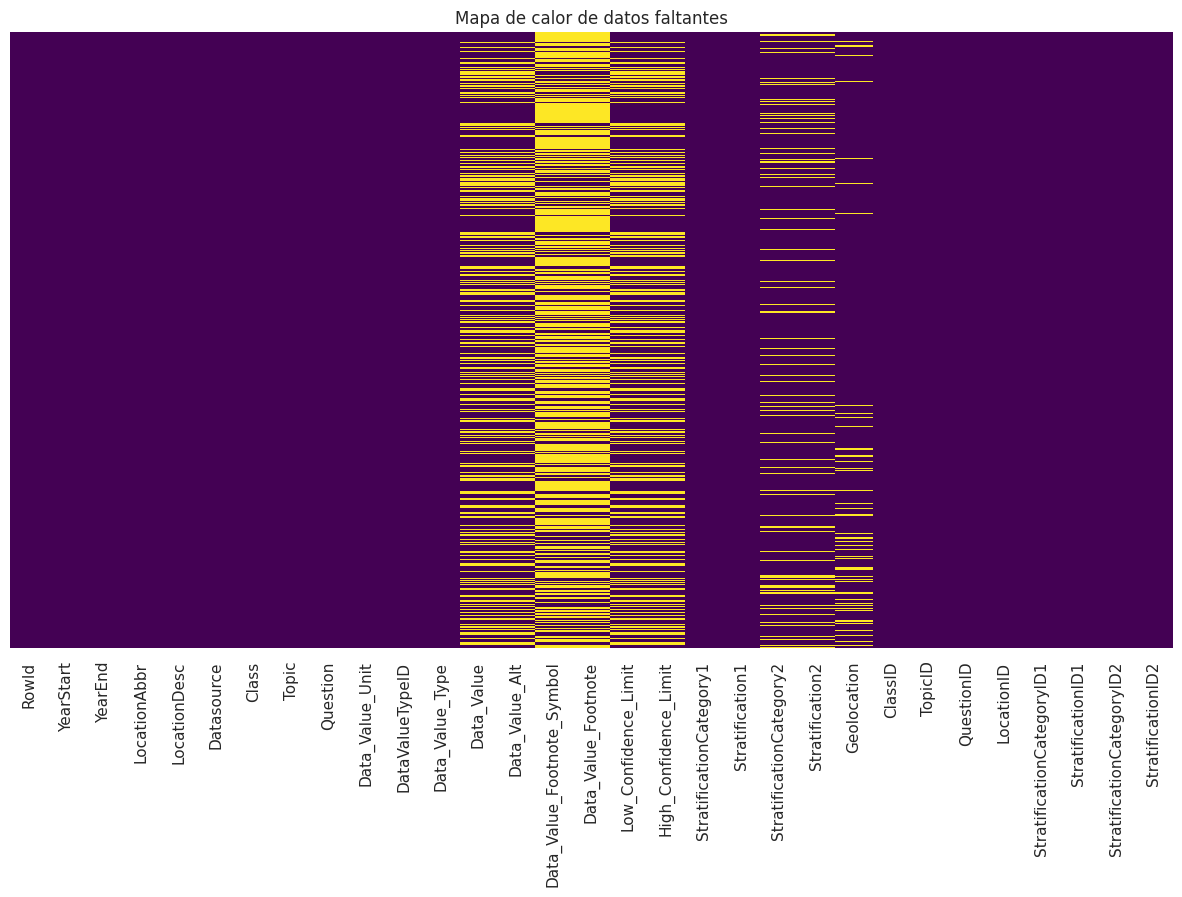

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor de datos faltantes')
plt.show()

In [ ]:
# Para imputar con la media o la mediana en columnas numéricas
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            df[column].fillna(df[column].median(), inplace=True)  # o .mean()

# Para imputar con la moda en columnas categóricas
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)

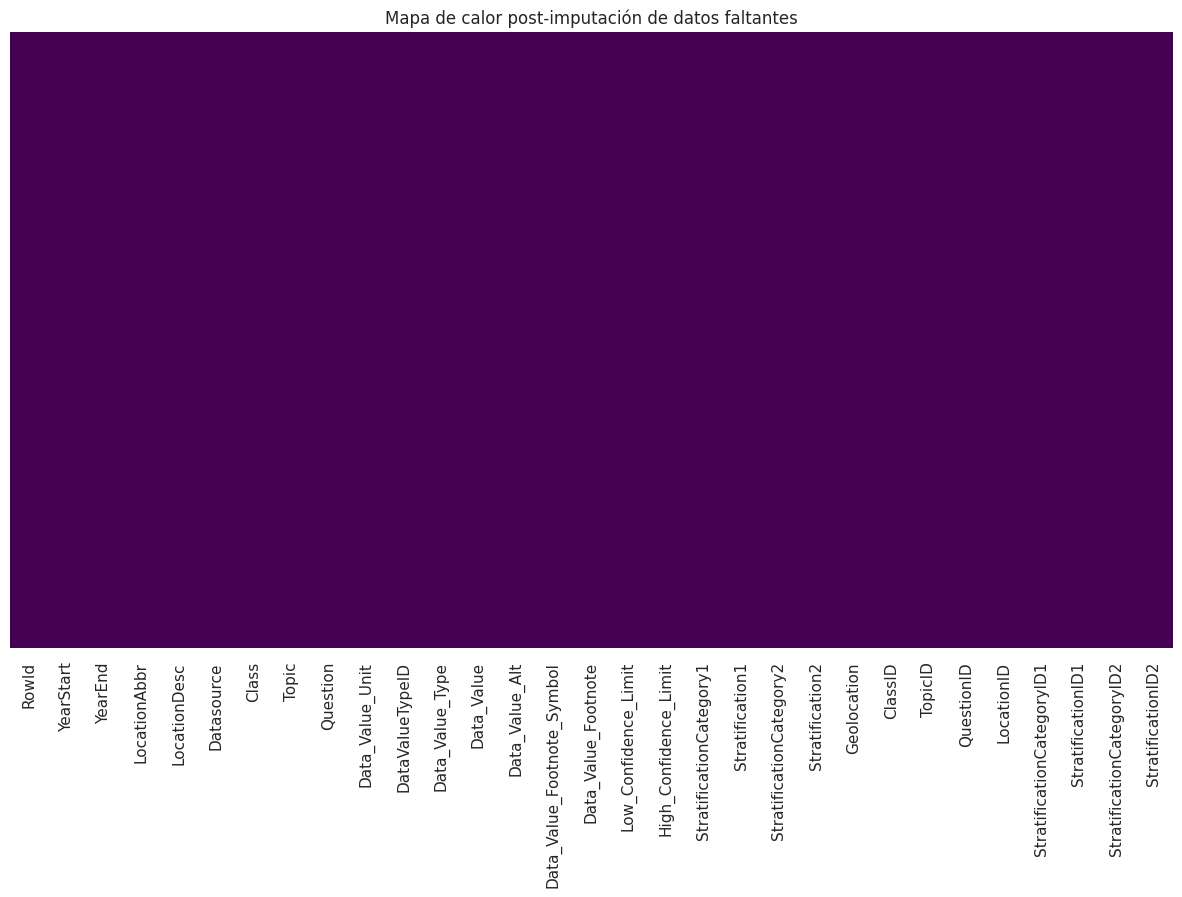

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor post-imputación de datos faltantes')
plt.show()

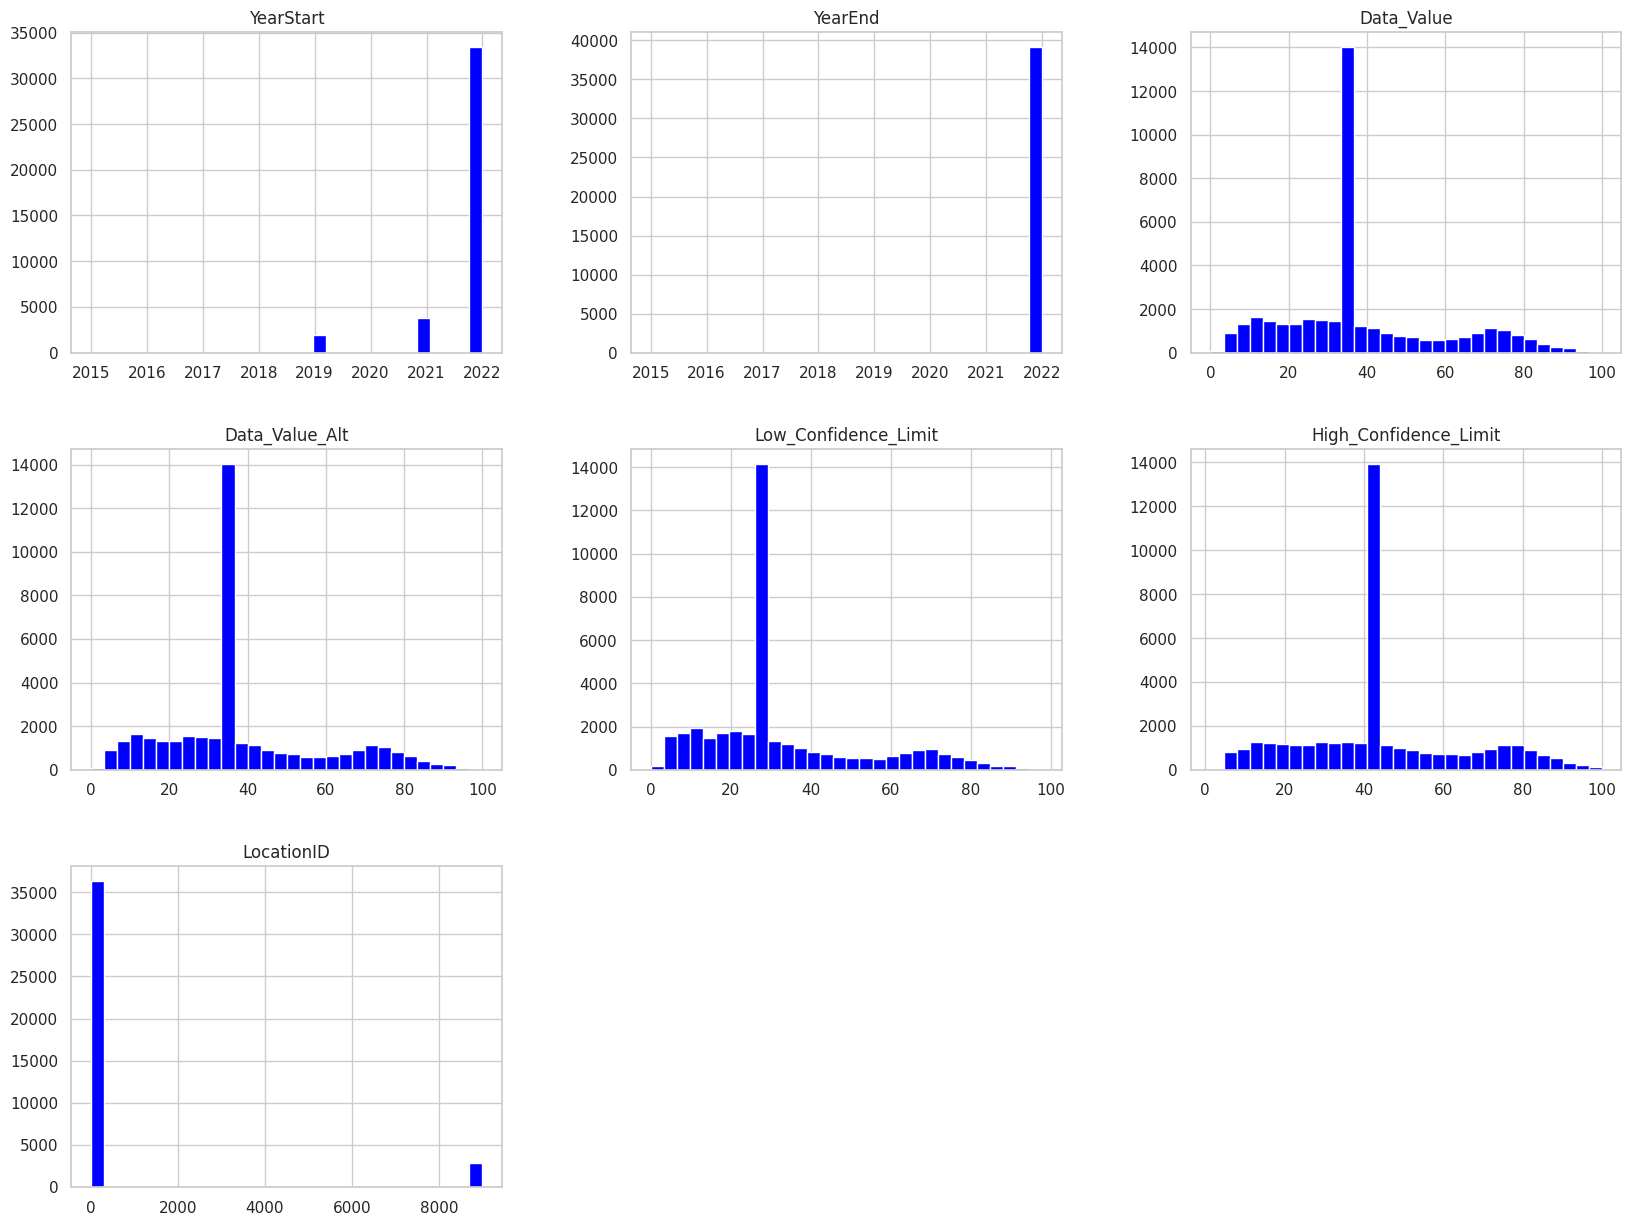

In [ ]:
df.hist(bins=30, figsize=(20, 15), color='blue')
plt.show()

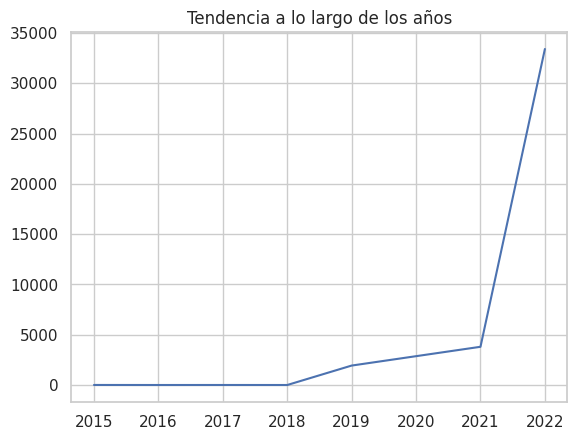

In [ ]:
# hay más interés en algo en ciertos años o si algo está mejorando o empeorando con el tiempo.
plt.plot(df.groupby('YearStart').size())
plt.title('Tendencia a lo largo de los años')
plt.show()

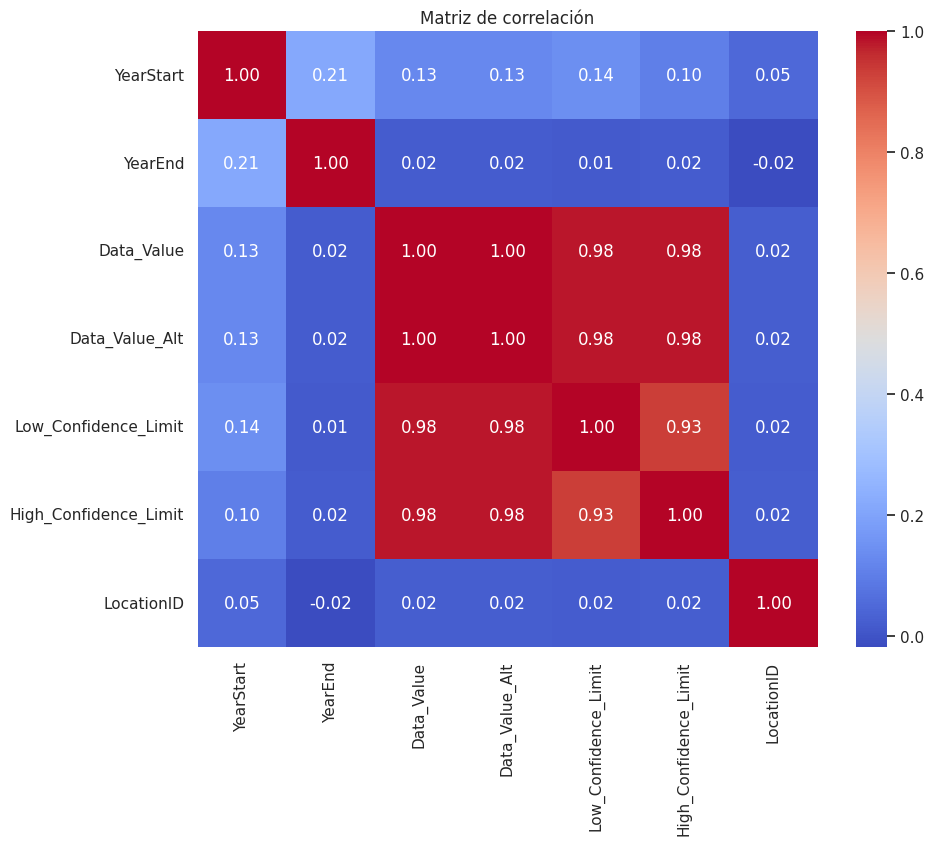

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Calcular Z-Scores
df['Z_Score_Data_Value'] = stats.zscore(df['Data_Value'])

# Identificar valores atípicos como aquellos donde el valor absoluto del Z-Score es mayor que 3
outliers_z = df[(df['Z_Score_Data_Value'].abs() > 3)]
print(f"Número de valores atípicos según Z-Score en 'Data_Value': {len(outliers_z)}")

Número de valores atípicos según Z-Score en 'Data_Value': 18


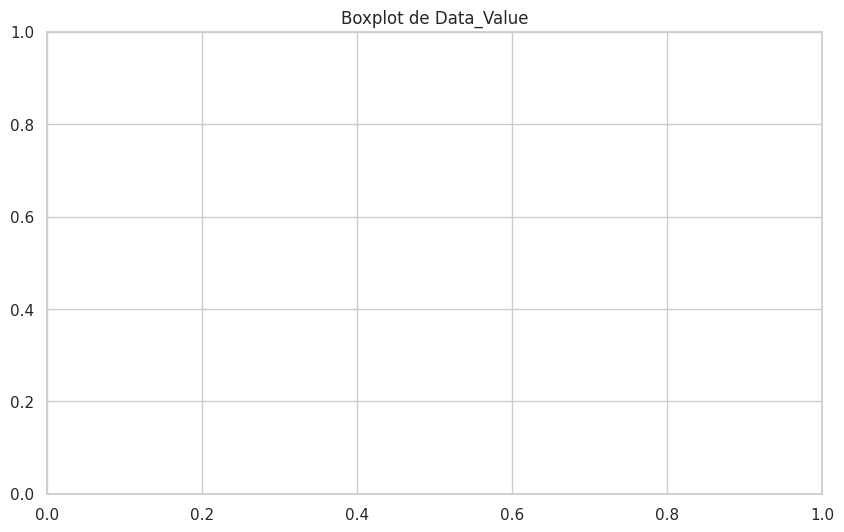

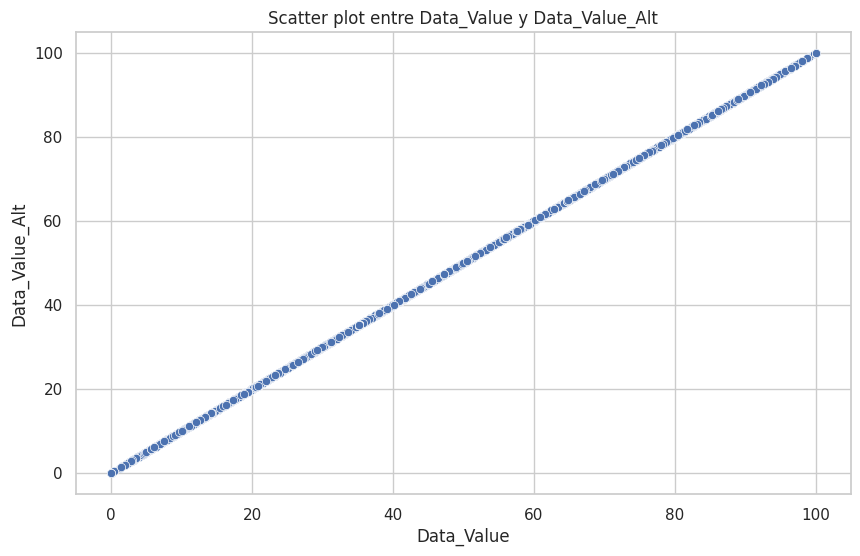

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df=df['Data_Value'])
plt.title('Boxplot de Data_Value')
plt.show()

#comparando ando
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Data_Value'], y=df['Data_Value_Alt'])
plt.title('Scatter plot entre Data_Value y Data_Value_Alt')
plt.show()

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['Data_Value'].quantile(0.25)
Q3 = df['Data_Value'].quantile(0.75)
IQR = Q3 - Q1

# Definir valores atípicos como aquellos que están por debajo de Q1-1.5*IQR o por encima de Q3+1.5*IQR
outliers = df[(df['Data_Value'] < (Q1 - 1.5 * IQR)) | (df['Data_Value'] > (Q3 + 1.5 * IQR))]
print(f"Número de valores atípicos en 'Data_Value': {len(outliers)}")

Número de valores atípicos en 'Data_Value': 3933


In [ ]:
# Limitar valores atípicos
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['Data_Value_Capped'] = df['Data_Value'].clip(lower=lower_limit, upper=upper_limit)

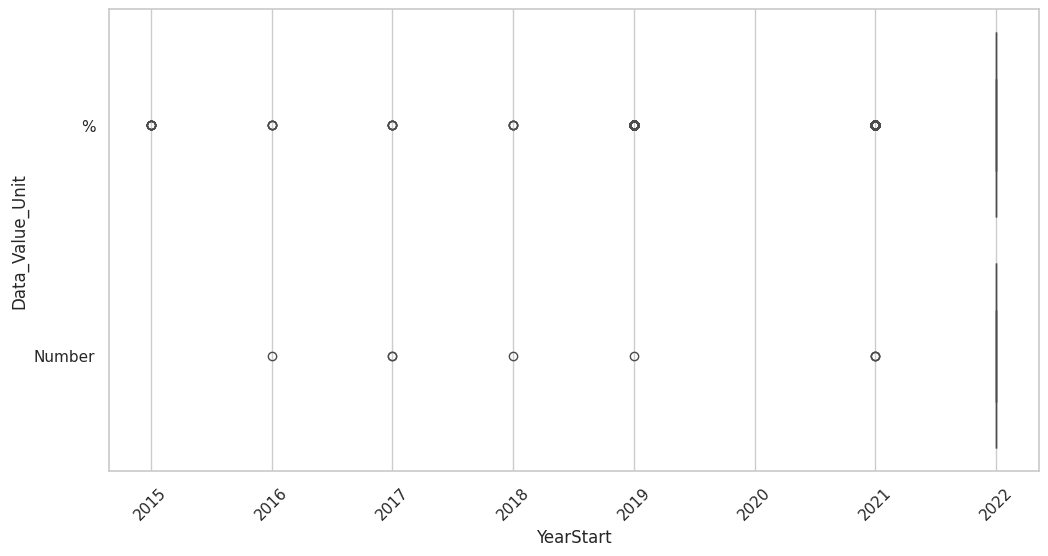

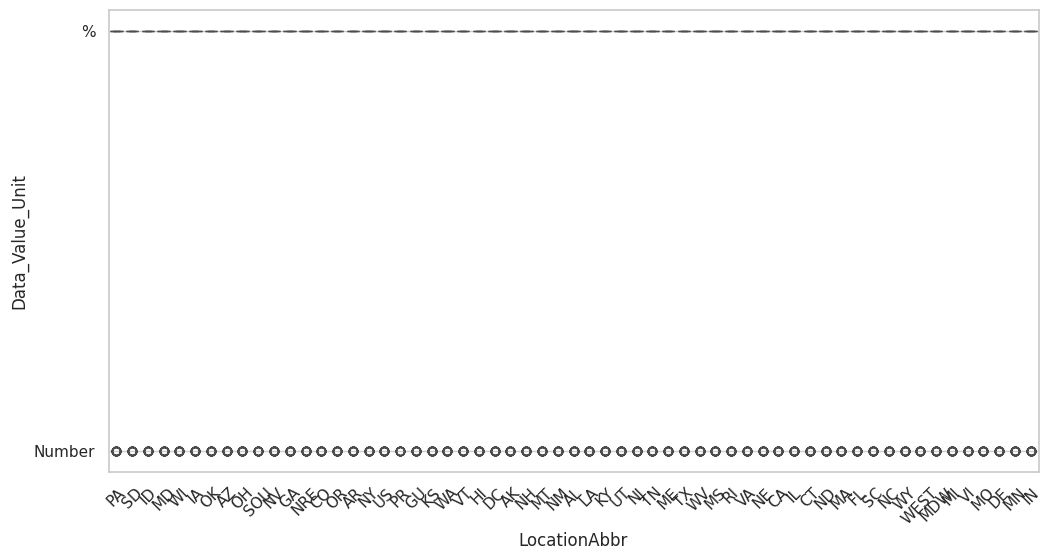

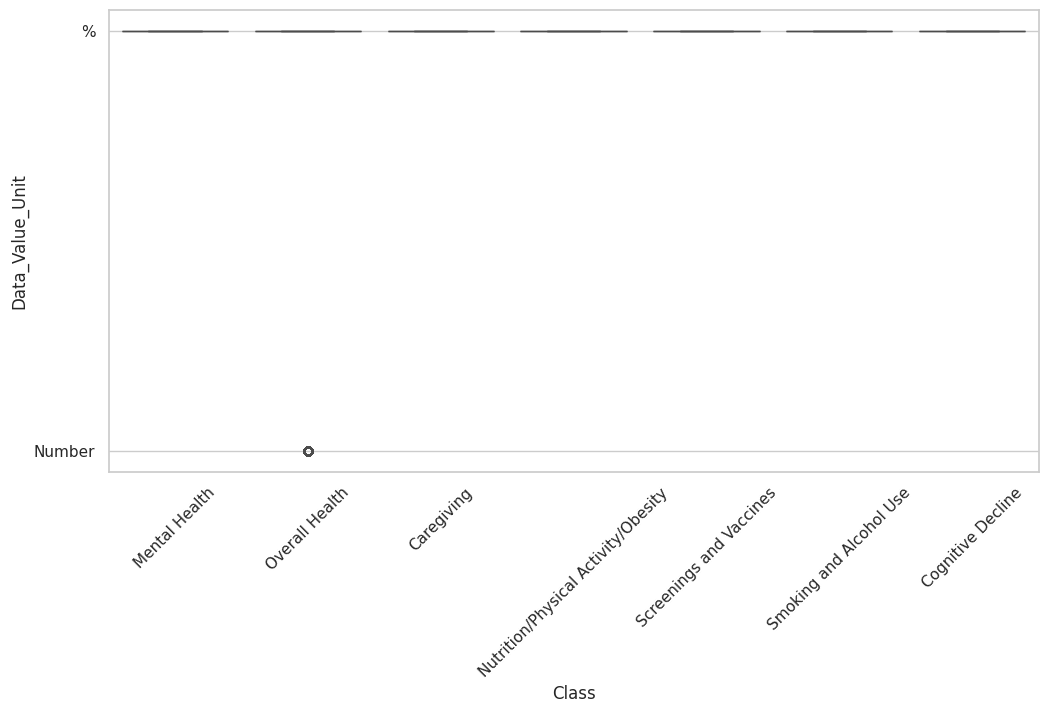

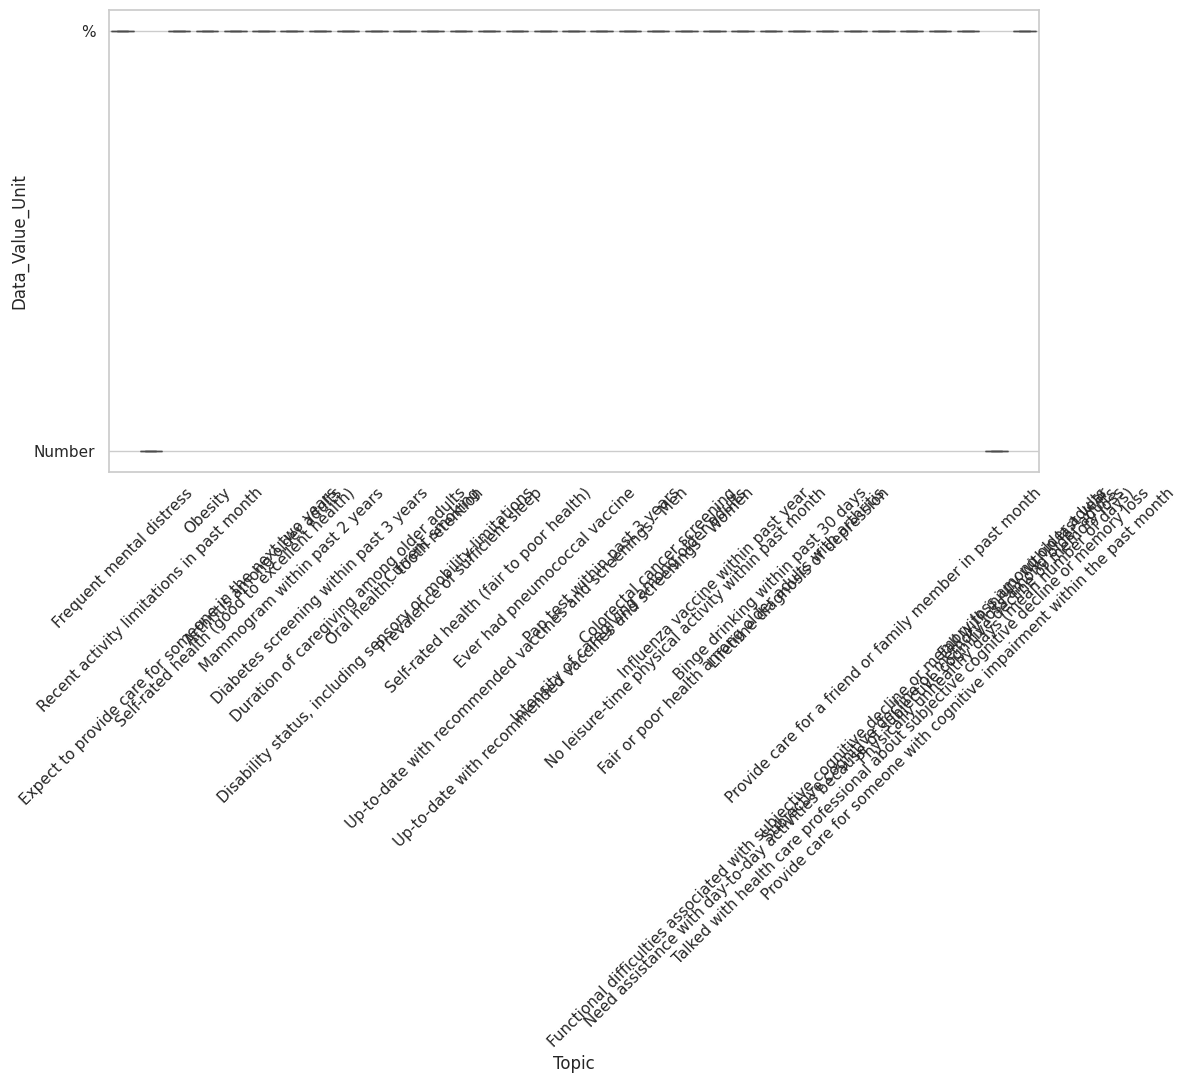

Frecuencia de LocationDesc:
LocationDesc
United States, DC & Territories    822
Utah                               792
Virginia                           789
Ohio                               784
Oregon                             779
Wisconsin                          777
Arizona                            759
Nevada                             759
Northeast                          744
Michigan                           735
Georgia                            724
Maine                              717
Indiana                            716
South Carolina                     714
Iowa                               712
South                              710
West                               709
New Hampshire                      703
Midwest                            703
Pennsylvania                       701
Louisiana                          697
Connecticut                        696
Colorado                           694
Washington                         693
Rhode Island           

In [ ]:
# Boxplots para examinar las relaciones entre variables categóricas y continuas
for column in ['YearStart', 'LocationAbbr', 'Class', 'Topic']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y='Data_Value_Unit', data=df)
    plt.xticks(rotation=45)
    plt.show()

# Conteos de frecuencia para variables categóricas
for column in ['LocationDesc', 'StratificationCategoryID1']:
    print(f"Frecuencia de {column}:")
    print(df[column].value_counts())
    print('\n')

In [ ]:
print(df.columns)

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2', 'Z_Score_Data_Value',
       'Data_Value_Capped'],
      dtype='object')


In [ ]:
# Contar el número de valores faltantes por columna
missing_values_count = df.isnull().sum()

# Filtrar y mostrar solo las columnas que tienen valores faltantes
print(missing_values_count[missing_values_count > 0])

Series([], dtype: int64)


In [ ]:
df['LocationDesc_encoded'] = df['LocationDesc'].astype('category').cat.codes

In [ ]:
# Eliminar la columna
df = df.drop('RowId', axis=1)

In [ ]:
columnas_seleccionadas = df[['Class', 'ClassID']]

print(columnas_seleccionadas)

                   Class ClassID
0          Mental Health     C05
1          Mental Health     C05
2          Mental Health     C05
3          Mental Health     C05
4          Mental Health     C05
...                  ...     ...
39179         Caregiving     C07
39180  Cognitive Decline     C06
39181         Caregiving     C07
39182         Caregiving     C07
39183     Overall Health     C01

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('ClassID', axis=1)

In [ ]:
columnas_seleccionadas = df[['Topic', 'TopicID']]

print(columnas_seleccionadas)

                                                   Topic TopicID
0                               Frequent mental distress   TMC01
1                               Frequent mental distress   TMC01
2                               Frequent mental distress   TMC01
3                               Frequent mental distress   TMC01
4                               Frequent mental distress   TMC01
...                                                  ...     ...
39179  Provide care for a friend or family member in ...   TGC01
39180  Need assistance with day-to-day activities bec...   TCC03
39181  Expect to provide care for someone in the next...   TGC02
39182  Provide care for a friend or family member in ...   TGC01
39183                           Frequent mental distress   TMC01

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('Topic', axis=1)

In [ ]:
columnas_seleccionadas = df[['Question', 'QuestionID']]

print(columnas_seleccionadas)

                                                Question QuestionID
0      Percentage of older adults who are experiencin...        Q03
1      Percentage of older adults who are experiencin...        Q03
2      Percentage of older adults who are experiencin...        Q03
3      Percentage of older adults who are experiencin...        Q03
4      Percentage of older adults who are experiencin...        Q03
...                                                  ...        ...
39179  Percentage of older adults who provided care f...        Q36
39180  Percentage of older adults who reported that a...        Q41
39181  Percentage of older adults currently not provi...        Q37
39182  Percentage of older adults who provided care f...        Q36
39183  Percentage of older adults who are experiencin...        Q03

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('Question', axis=1)

In [ ]:
columnas_seleccionadas = df[['LocationAbbr', 'LocationDesc','LocationID']]

print(columnas_seleccionadas)

      LocationAbbr                     LocationDesc  LocationID
0               PA                     Pennsylvania        42.0
1               SD                     South Dakota        46.0
2               ID                            Idaho        16.0
3               MD                         Maryland        24.0
4               WI                        Wisconsin        55.0
...            ...                              ...         ...
39179           AL                          Alabama         1.0
39180           MD                         Maryland        24.0
39181           NJ                       New Jersey        34.0
39182           AK                           Alaska         2.0
39183           US  United States, DC & Territories        33.0

[39184 rows x 3 columns]


In [ ]:
# Eliminar la columna
df = df.drop('LocationDesc', axis=1)

In [ ]:
# Eliminar la columna
df = df.drop('LocationAbbr', axis=1)

In [ ]:
columnas_seleccionadas = df[['Data_Value_Type', 'DataValueTypeID']]

print(columnas_seleccionadas)

      Data_Value_Type DataValueTypeID
0          Percentage           PRCTG
1          Percentage           PRCTG
2          Percentage           PRCTG
3          Percentage           PRCTG
4          Percentage           PRCTG
...               ...             ...
39179      Percentage           PRCTG
39180      Percentage           PRCTG
39181      Percentage           PRCTG
39182      Percentage           PRCTG
39183      Percentage           PRCTG

[39184 rows x 2 columns]


In [ ]:
frecuencia_valores = df['Data_Value_Type'].value_counts()
print(frecuencia_valores)

Data_Value_Type
Percentage    37807
Mean           1377
Name: count, dtype: int64


In [ ]:
# Eliminar la columna
df = df.drop('Data_Value_Type', axis=1)

In [ ]:
columnas_seleccionadas = df[['StratificationCategory1', 'StratificationCategoryID1']]

print(columnas_seleccionadas)

      StratificationCategory1 StratificationCategoryID1
0                   Age Group                       AGE
1                   Age Group                       AGE
2                   Age Group                       AGE
3                   Age Group                       AGE
4                   Age Group                       AGE
...                       ...                       ...
39179               Age Group                       AGE
39180               Age Group                       AGE
39181               Age Group                       AGE
39182               Age Group                       AGE
39183               Age Group                       AGE

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('StratificationCategory1', axis=1)

In [ ]:
columnas_seleccionadas = df[['Stratification1', 'StratificationID1']]

print(columnas_seleccionadas)

         Stratification1 StratificationID1
0            50-64 years              5064
1      65 years or older            65PLUS
2      65 years or older            65PLUS
3      65 years or older            65PLUS
4      65 years or older            65PLUS
...                  ...               ...
39179        50-64 years              5064
39180        50-64 years              5064
39181  65 years or older            65PLUS
39182  65 years or older            65PLUS
39183        50-64 years              5064

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('Stratification1', axis=1)

In [ ]:
columnas_seleccionadas = df[['Stratification2', 'StratificationID2']]

print(columnas_seleccionadas)

                Stratification2 StratificationID2
0      Native Am/Alaskan Native               NAA
1        Asian/Pacific Islander               ASN
2           Black, non-Hispanic               BLK
3           Black, non-Hispanic               BLK
4                          Male              MALE
...                         ...               ...
39179                    Female           OVERALL
39180                    Female            FEMALE
39181                    Female           OVERALL
39182                    Female           OVERALL
39183                    Female           OVERALL

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('Stratification2', axis=1)

In [ ]:
columnas_seleccionadas = df[['StratificationCategory2', 'StratificationCategoryID2']]

print(columnas_seleccionadas)

      StratificationCategory2 StratificationCategoryID2
0              Race/Ethnicity                      RACE
1              Race/Ethnicity                      RACE
2              Race/Ethnicity                      RACE
3              Race/Ethnicity                      RACE
4                      Gender                    GENDER
...                       ...                       ...
39179          Race/Ethnicity                   OVERALL
39180                  Gender                    GENDER
39181          Race/Ethnicity                   OVERALL
39182          Race/Ethnicity                   OVERALL
39183          Race/Ethnicity                      RACE

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('StratificationCategory2', axis=1)

In [ ]:
print(df.columns)

Index(['YearStart', 'YearEnd', 'Datasource', 'Class', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Geolocation',
       'TopicID', 'QuestionID', 'LocationID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'Z_Score_Data_Value', 'Data_Value_Capped', 'LocationDesc_encoded'],
      dtype='object')


In [ ]:
print(df.iloc[200])

YearStart                                                                2022.0
YearEnd                                                                  2022.0
Datasource                                                                BRFSS
Class                                       Nutrition/Physical Activity/Obesity
Data_Value_Unit                                                               %
DataValueTypeID                                                           PRCTG
Data_Value                                                                 35.2
Data_Value_Alt                                                             35.2
Data_Value_Footnote_Symbol                                                 ****
Data_Value_Footnote           Sample size of denominator and/or age group fo...
Low_Confidence_Limit                                                       28.7
High_Confidence_Limit                                                      42.3
Geolocation                             

In [ ]:
columnas_seleccionadas = df[['Data_Value_Footnote_Symbol', 'Data_Value_Footnote']]

print(columnas_seleccionadas)

      Data_Value_Footnote_Symbol  \
0                              ~   
1                              ~   
2                              ~   
3                           ****   
4                           ****   
...                          ...   
39179                       ****   
39180                       ****   
39181                       ****   
39182                       ****   
39183                       ****   

                                     Data_Value_Footnote  
0                                      No Data Available  
1                                      No Data Available  
2                                      No Data Available  
3      Sample size of denominator and/or age group fo...  
4      Sample size of denominator and/or age group fo...  
...                                                  ...  
39179  Sample size of denominator and/or age group fo...  
39180  Sample size of denominator and/or age group fo...  
39181  Sample size of denominator an

In [ ]:
columnas_seleccionadas = df[['Data_Value_Alt', 'Data_Value']]

print(columnas_seleccionadas)

       Data_Value_Alt  Data_Value
0                35.2        35.2
1                35.2        35.2
2                35.2        35.2
3                 9.0         9.0
4                 5.6         5.6
...               ...         ...
39179            32.3        32.3
39180            22.0        22.0
39181            12.1        12.1
39182            23.3        23.3
39183            35.2        35.2

[39184 rows x 2 columns]


In [ ]:
# Eliminar la columna
df = df.drop('Data_Value', axis=1)

In [ ]:
frecuencia_valores = df['Data_Value_Unit'].value_counts()
print(frecuencia_valores)

Data_Value_Unit
%         37807
Number     1377
Name: count, dtype: int64


In [ ]:
print(df[df['Data_Value_Unit'] == plt.Number])

Empty DataFrame
Columns: [YearStart, YearEnd, Datasource, Class, Data_Value_Unit, DataValueTypeID, Data_Value_Alt, Data_Value_Footnote_Symbol, Data_Value_Footnote, Low_Confidence_Limit, High_Confidence_Limit, Geolocation, TopicID, QuestionID, LocationID, StratificationCategoryID1, StratificationID1, StratificationCategoryID2, StratificationID2, Z_Score_Data_Value, Data_Value_Capped, LocationDesc_encoded]
Index: []

[0 rows x 22 columns]


In [ ]:
columnas_seleccionadas = df[['Data_Value_Unit']]

print(columnas_seleccionadas)

      Data_Value_Unit
0                   %
1                   %
2                   %
3                   %
4                   %
...               ...
39179               %
39180               %
39181               %
39182               %
39183               %

[39184 rows x 1 columns]


In [ ]:
print(df.columns)

Index(['YearStart', 'YearEnd', 'Datasource', 'Class', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Geolocation', 'TopicID', 'QuestionID', 'LocationID',
       'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2', 'Z_Score_Data_Value',
       'Data_Value_Capped', 'LocationDesc_encoded'],
      dtype='object')


In [ ]:
df.head()

,YearStart,YearEnd,Datasource,Class,Data_Value_Unit,DataValueTypeID,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,...,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,Data_Value_Capped,LocationDesc_encoded
0,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,35.2,~,No Data Available,28.7,...,TMC01,Q03,42.0,AGE,5064,RACE,NAA,-0.163718,35.2,41
1,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,35.2,~,No Data Available,28.7,...,TMC01,Q03,46.0,AGE,65PLUS,RACE,ASN,-0.163718,35.2,46
2,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,35.2,~,No Data Available,28.7,...,TMC01,Q03,16.0,AGE,65PLUS,RACE,BLK,-0.163718,35.2,13
3,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,9.0,****,Sample size of denominator and/or age group fo...,6.5,...,TMC01,Q03,24.0,AGE,65PLUS,RACE,BLK,-1.478241,9.0,21
4,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,5.6,****,Sample size of denominator and/or age group fo...,4.4,...,TMC01,Q03,55.0,AGE,65PLUS,GENDER,MALE,-1.648828,5.6,57


In [ ]:
# Eliminar la columna
df = df.drop('Data_Value_Footnote', axis=1)

In [ ]:
df.head()

,YearStart,YearEnd,Datasource,Class,Data_Value_Unit,DataValueTypeID,Data_Value_Alt,Data_Value_Footnote_Symbol,Low_Confidence_Limit,High_Confidence_Limit,...,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,Data_Value_Capped,LocationDesc_encoded
0,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,35.2,~,28.7,42.3,...,TMC01,Q03,42.0,AGE,5064,RACE,NAA,-0.163718,35.2,41
1,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,35.2,~,28.7,42.3,...,TMC01,Q03,46.0,AGE,65PLUS,RACE,ASN,-0.163718,35.2,46
2,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,35.2,~,28.7,42.3,...,TMC01,Q03,16.0,AGE,65PLUS,RACE,BLK,-0.163718,35.2,13
3,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,9.0,****,6.5,12.3,...,TMC01,Q03,24.0,AGE,65PLUS,RACE,BLK,-1.478241,9.0,21
4,2022.0,2022.0,BRFSS,Mental Health,%,PRCTG,5.6,****,4.4,7.2,...,TMC01,Q03,55.0,AGE,65PLUS,GENDER,MALE,-1.648828,5.6,57


In [ ]:
# Eliminar la columna
df = df.drop('Data_Value_Unit', axis=1)

In [ ]:
# Eliminar la columna
df = df.drop('Geolocation', axis=1)

In [ ]:
df.head()

,YearStart,YearEnd,Datasource,Class,DataValueTypeID,Data_Value_Alt,Data_Value_Footnote_Symbol,Low_Confidence_Limit,High_Confidence_Limit,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,Data_Value_Capped,LocationDesc_encoded
0,2022.0,2022.0,BRFSS,Mental Health,PRCTG,35.2,~,28.7,42.3,TMC01,Q03,42.0,AGE,5064,RACE,NAA,-0.163718,35.2,41
1,2022.0,2022.0,BRFSS,Mental Health,PRCTG,35.2,~,28.7,42.3,TMC01,Q03,46.0,AGE,65PLUS,RACE,ASN,-0.163718,35.2,46
2,2022.0,2022.0,BRFSS,Mental Health,PRCTG,35.2,~,28.7,42.3,TMC01,Q03,16.0,AGE,65PLUS,RACE,BLK,-0.163718,35.2,13
3,2022.0,2022.0,BRFSS,Mental Health,PRCTG,9.0,****,6.5,12.3,TMC01,Q03,24.0,AGE,65PLUS,RACE,BLK,-1.478241,9.0,21
4,2022.0,2022.0,BRFSS,Mental Health,PRCTG,5.6,****,4.4,7.2,TMC01,Q03,55.0,AGE,65PLUS,GENDER,MALE,-1.648828,5.6,57


In [ ]:
# Eliminar la columna
df = df.drop('Data_Value_Capped', axis=1)

In [ ]:
df.head()

,YearStart,YearEnd,Datasource,Class,DataValueTypeID,Data_Value_Alt,Data_Value_Footnote_Symbol,Low_Confidence_Limit,High_Confidence_Limit,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,LocationDesc_encoded
0,2022.0,2022.0,BRFSS,Mental Health,PRCTG,35.2,~,28.7,42.3,TMC01,Q03,42.0,AGE,5064,RACE,NAA,-0.163718,41
1,2022.0,2022.0,BRFSS,Mental Health,PRCTG,35.2,~,28.7,42.3,TMC01,Q03,46.0,AGE,65PLUS,RACE,ASN,-0.163718,46
2,2022.0,2022.0,BRFSS,Mental Health,PRCTG,35.2,~,28.7,42.3,TMC01,Q03,16.0,AGE,65PLUS,RACE,BLK,-0.163718,13
3,2022.0,2022.0,BRFSS,Mental Health,PRCTG,9.0,****,6.5,12.3,TMC01,Q03,24.0,AGE,65PLUS,RACE,BLK,-1.478241,21
4,2022.0,2022.0,BRFSS,Mental Health,PRCTG,5.6,****,4.4,7.2,TMC01,Q03,55.0,AGE,65PLUS,GENDER,MALE,-1.648828,57


In [ ]:
mismos_datos = df['YearStart'].equals(df['YearEnd'])

if mismos_datos:
    print("Las columnas tienen los mismos datos.")
else:
    print("Las columnas no tienen los mismos datos.")

Las columnas no tienen los mismos datos.


#**PARTIR EL DATASET EN TRAIN Y TEST**

In [ ]:
entrenamiento, prueba = train_test_split(df, test_size=0.2, random_state=42)

# Guarda los conjuntos de datos en archivos CSV
entrenamiento.to_csv("entrenamiento.csv", index=False)
prueba.to_csv("prueba.csv", index=False)

In [ ]:
train_data = pd.read_csv('entrenamiento.csv')

In [ ]:
validation_data = pd.read_csv('prueba.csv')

In [ ]:
train_data.head()

,YearStart,YearEnd,Datasource,Class,DataValueTypeID,Data_Value_Alt,Data_Value_Footnote_Symbol,Low_Confidence_Limit,High_Confidence_Limit,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,LocationDesc_encoded
0,2022.0,2022.0,BRFSS,Nutrition/Physical Activity/Obesity,PRCTG,24.8,****,23.1,26.7,TNC03,Q16,36.0,AGE,AGE_OVERALL,GENDER,MALE,-0.685513,34
1,2022.0,2022.0,BRFSS,Cognitive Decline,PRCTG,35.2,****,28.7,42.3,TCC01,Q30,12.0,AGE,65PLUS,RACE,NAA,-0.163718,9
2,2022.0,2022.0,BRFSS,Caregiving,PRCTG,73.6,****,69.2,77.6,TGC03,Q38,39.0,AGE,65PLUS,OVERALL,OVERALL,1.762912,38
3,2022.0,2022.0,BRFSS,Smoking and Alcohol Use,PRCTG,10.4,****,9.1,11.8,TAC01,Q17,36.0,AGE,AGE_OVERALL,GENDER,FEMALE,-1.408000,34
4,2022.0,2022.0,BRFSS,Overall Health,PRCTG,71.8,****,70.3,73.2,TOC05,Q07,45.0,AGE,AGE_OVERALL,OVERALL,OVERALL,1.672601,45


In [ ]:
validation_data.head()

,YearStart,YearEnd,Datasource,Class,DataValueTypeID,Data_Value_Alt,Data_Value_Footnote_Symbol,Low_Confidence_Limit,High_Confidence_Limit,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Z_Score_Data_Value,LocationDesc_encoded
0,2022.0,2022.0,BRFSS,Screenings and Vaccines,PRCTG,63.4,****,40.8,81.3,TSC08,Q18,66.0,AGE,65PLUS,RACE,WHT,1.251151,11
1,2019.0,2022.0,BRFSS,Cognitive Decline,PRCTG,30.0,****,23.6,37.3,TCC02,Q31,27.0,AGE,AGE_OVERALL,GENDER,MALE,-0.424616,25
2,2022.0,2022.0,BRFSS,Overall Health,PRCTG,29.7,****,26.4,33.3,TOC13,Q45,30.0,AGE,AGE_OVERALL,GENDER,FEMALE,-0.439667,28
3,2022.0,2022.0,BRFSS,Screenings and Vaccines,PRCTG,63.3,****,55.8,70.1,TSC08,Q18,6.0,AGE,65PLUS,RACE,HIS,1.246134,4
4,2022.0,2022.0,BRFSS,Overall Health,PRCTG,69.9,****,65.5,74.0,TOC08,Q33,5.0,AGE,5064,GENDER,MALE,1.577273,3


In [ ]:
entrenamiento_adicional, validacion = train_test_split(train_data, test_size=0.2, random_state=42)

# **CONVERTIR A NUMERICO Y NORMALIZAR**

In [ ]:
# Obtener las columnas categóricas excluyendo la columna "class"
columnas_categoricas = [col for col in entrenamiento_adicional.columns if col != 'Class' and entrenamiento_adicional[col].dtype == 'object']

# Obtener las columnas numéricas
columnas_numericas = [col for col in entrenamiento_adicional.columns if col != 'Class' and entrenamiento_adicional[col].dtype != 'object']

# Realizar la codificación one-hot en las columnas categóricas solamente
entrenamiento_adicional_encoded = pd.get_dummies(entrenamiento_adicional, columns=columnas_categoricas, drop_first=True)

# Mantener las columnas numéricas y la columna "class" sin cambios
entrenamiento_adicional_encoded[columnas_numericas] = entrenamiento_adicional[columnas_numericas]
entrenamiento_adicional_encoded['Class'] = entrenamiento_adicional['Class']


In [ ]:
entrenamiento_adicional_encoded.head()

,YearStart,YearEnd,Class,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Z_Score_Data_Value,LocationDesc_encoded,DataValueTypeID_PRCTG,...,StratificationID1_AGE_OVERALL,StratificationCategoryID2_OVERALL,StratificationCategoryID2_RACE,StratificationID2_BLK,StratificationID2_FEMALE,StratificationID2_HIS,StratificationID2_MALE,StratificationID2_NAA,StratificationID2_OVERALL,StratificationID2_WHT
8663,2021.0,2022.0,Caregiving,9.9,6.5,14.8,9002.0,-1.433086,24,True,...,True,False,True,False,False,True,False,False,False,False
14786,2022.0,2022.0,Caregiving,35.2,28.7,42.3,8.0,-0.163718,5,True,...,False,False,True,False,False,True,False,False,False,False
4459,2022.0,2022.0,Cognitive Decline,44.7,38.1,51.5,9001.0,0.312922,37,True,...,False,True,False,False,False,False,False,False,True,False
4371,2022.0,2022.0,Overall Health,45.6,27.6,64.9,21.0,0.358078,18,True,...,True,False,True,True,False,False,False,False,False,False
6867,2022.0,2022.0,Cognitive Decline,30.5,20.6,42.5,44.0,-0.399529,43,True,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
# Obtener las columnas categóricas excluyendo la columna "class"
columnas_categoricas = [col for col in validacion.columns if col != 'Class' and validacion[col].dtype == 'object']

# Obtener las columnas numéricas
columnas_numericas = [col for col in validacion.columns if col != 'Class' and validacion[col].dtype != 'object']

# Aplicar el mismo proceso a los datos de validación
validacion_encoded = pd.get_dummies(validacion, columns=columnas_categoricas, drop_first=True)
validacion_encoded[columnas_numericas] = validacion[columnas_numericas]
validacion_encoded['Class'] = validacion['Class']

In [ ]:
validacion_encoded.head()

,YearStart,YearEnd,Class,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Z_Score_Data_Value,LocationDesc_encoded,DataValueTypeID_PRCTG,...,StratificationID1_AGE_OVERALL,StratificationCategoryID2_OVERALL,StratificationCategoryID2_RACE,StratificationID2_BLK,StratificationID2_FEMALE,StratificationID2_HIS,StratificationID2_MALE,StratificationID2_NAA,StratificationID2_OVERALL,StratificationID2_WHT
19391,2022.0,2022.0,Smoking and Alcohol Use,14.0,13.3,14.7,9003.0,-1.227378,44,True,...,True,False,False,False,False,False,True,False,False,False
24841,2021.0,2022.0,Caregiving,70.9,59.0,80.5,6.0,1.627446,4,True,...,False,False,True,False,False,False,False,False,False,True
25812,2022.0,2022.0,Overall Health,35.2,28.7,42.3,19.0,-0.163718,16,True,...,False,False,True,True,False,False,False,False,False,False
30497,2022.0,2022.0,Screenings and Vaccines,46.2,31.8,61.2,27.0,0.388181,25,True,...,False,False,True,False,False,True,False,False,False,False
2213,2022.0,2022.0,Screenings and Vaccines,41.2,37.3,45.2,16.0,0.137318,13,True,...,False,False,False,False,True,False,False,False,False,False


Partir validacion y entrenamiento en test y train

In [ ]:
entrenamiento_prediccion = entrenamiento_adicional_encoded['Class']
entrenamiento_prediccion.head()

8663            Caregiving
14786           Caregiving
4459     Cognitive Decline
4371        Overall Health
6867     Cognitive Decline
Name: Class, dtype: object

In [ ]:
entrenamiento_datos = entrenamiento_adicional_encoded.drop(columns=['Class'])
entrenamiento_datos.head()

,YearStart,YearEnd,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Z_Score_Data_Value,LocationDesc_encoded,DataValueTypeID_PRCTG,Data_Value_Footnote_Symbol_&,...,StratificationID1_AGE_OVERALL,StratificationCategoryID2_OVERALL,StratificationCategoryID2_RACE,StratificationID2_BLK,StratificationID2_FEMALE,StratificationID2_HIS,StratificationID2_MALE,StratificationID2_NAA,StratificationID2_OVERALL,StratificationID2_WHT
8663,2021.0,2022.0,9.9,6.5,14.8,9002.0,-1.433086,24,True,True,...,True,False,True,False,False,True,False,False,False,False
14786,2022.0,2022.0,35.2,28.7,42.3,8.0,-0.163718,5,True,False,...,False,False,True,False,False,True,False,False,False,False
4459,2022.0,2022.0,44.7,38.1,51.5,9001.0,0.312922,37,True,True,...,False,True,False,False,False,False,False,False,True,False
4371,2022.0,2022.0,45.6,27.6,64.9,21.0,0.358078,18,True,False,...,True,False,True,True,False,False,False,False,False,False
6867,2022.0,2022.0,30.5,20.6,42.5,44.0,-0.399529,43,True,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
validacion_prediccion = validacion_encoded['Class']
validacion_prediccion.head()

19391    Smoking and Alcohol Use
24841                 Caregiving
25812             Overall Health
30497    Screenings and Vaccines
2213     Screenings and Vaccines
Name: Class, dtype: object

In [ ]:
validacion_datos = validacion_encoded.drop(columns=['Class'])
validacion_datos.head()

,YearStart,YearEnd,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Z_Score_Data_Value,LocationDesc_encoded,DataValueTypeID_PRCTG,Data_Value_Footnote_Symbol_&,...,StratificationID1_AGE_OVERALL,StratificationCategoryID2_OVERALL,StratificationCategoryID2_RACE,StratificationID2_BLK,StratificationID2_FEMALE,StratificationID2_HIS,StratificationID2_MALE,StratificationID2_NAA,StratificationID2_OVERALL,StratificationID2_WHT
19391,2022.0,2022.0,14.0,13.3,14.7,9003.0,-1.227378,44,True,False,...,True,False,False,False,False,False,True,False,False,False
24841,2021.0,2022.0,70.9,59.0,80.5,6.0,1.627446,4,True,False,...,False,False,True,False,False,False,False,False,False,True
25812,2022.0,2022.0,35.2,28.7,42.3,19.0,-0.163718,16,True,False,...,False,False,True,True,False,False,False,False,False,False
30497,2022.0,2022.0,46.2,31.8,61.2,27.0,0.388181,25,True,False,...,False,False,True,False,False,True,False,False,False,False
2213,2022.0,2022.0,41.2,37.3,45.2,16.0,0.137318,13,True,False,...,False,False,False,False,True,False,False,False,False,False


# **ESTANDARIZAR Y REDUCCION DE VARIABLES**

Estandarizar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fit el scaler al dataset de entrenamiento
scaler.fit(entrenamiento_datos)
#escalar
entrenamiento_escalado = scaler.transform(entrenamiento_datos)
validacion_escalado = scaler.transform(validacion_datos)

Reduccion de variables usando PCA

In [ ]:
from sklearn.decomposition import PCA
#Mantener el 85% de varianca de los datos
pca = PCA(0.85)
#Fit el pca al dataset de entrenamiento escalado
pca.fit(entrenamiento_escalado)
#reducir variables
entrenamiento_reducido = pca.transform(entrenamiento_escalado)
validacion_reducido = pca.transform(validacion_escalado)

print(f"Escalado: {entrenamiento_escalado.shape}")
print(f"Reducido: {entrenamiento_reducido.shape}")

Escalado: (25077, 88)
Reducido: (25077, 34)


# **Applicacion de Random Forest Y Buscar mejores parametros**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import itertools

parametros = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

keys, values = zip(*parametros.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

results = []
total_combinations = len(param_combinations)
progress = 0

for params in param_combinations:
    progress += 1

    rf = RandomForestClassifier(**params, random_state=42)

    rf.fit(entrenamiento_reducido, entrenamiento_prediccion)

    # Prediccion en entrenamiento
    entrenamiento_pred_arbol = rf.predict(entrenamiento_reducido)

    # prediccion en testing
    validacion_pred_arbol = rf.predict(validacion_reducido)

    # Calculo de la exactitud en ambos sets
    train_accuracy = accuracy_score(entrenamiento_prediccion, entrenamiento_pred_arbol)
    test_accuracy = accuracy_score(validacion_prediccion, validacion_pred_arbol)

    # Guardar resultados
    results.append({
        'params': params,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

    print(f'Progress: {progress}/{total_combinations} combinations')

Progress: 1/324 combinations
Progress: 2/324 combinations
Progress: 3/324 combinations
Progress: 4/324 combinations
Progress: 5/324 combinations
Progress: 6/324 combinations
Progress: 7/324 combinations
Progress: 8/324 combinations
Progress: 9/324 combinations
Progress: 10/324 combinations
Progress: 11/324 combinations
Progress: 12/324 combinations
Progress: 13/324 combinations
Progress: 14/324 combinations
Progress: 15/324 combinations
Progress: 16/324 combinations
Progress: 17/324 combinations
Progress: 18/324 combinations
Progress: 19/324 combinations
Progress: 20/324 combinations
Progress: 21/324 combinations
Progress: 22/324 combinations
Progress: 23/324 combinations
Progress: 24/324 combinations
Progress: 25/324 combinations
Progress: 26/324 combinations
Progress: 27/324 combinations
Progress: 28/324 combinations
Progress: 29/324 combinations
Progress: 30/324 combinations
Progress: 31/324 combinations
Progress: 32/324 combinations
Progress: 33/324 combinations
Progress: 34/324 co

Plot resultados

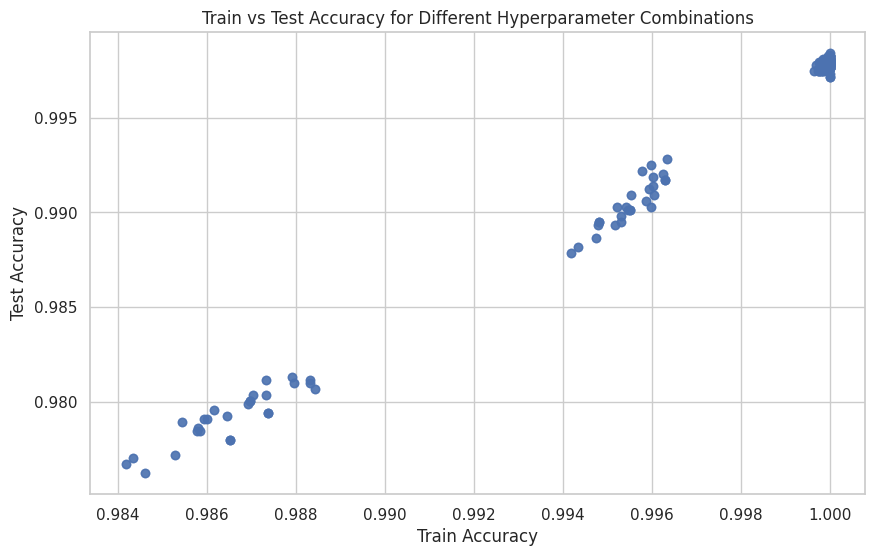

In [ ]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.scatter(results_df['train_accuracy'], results_df['test_accuracy'], alpha=0.7)
plt.xlabel('Train Accuracy')
plt.ylabel('Test Accuracy')
plt.title('Train vs Test Accuracy for Different Hyperparameter Combinations')
plt.show()

In [ ]:
results_df.to_csv('hyperparameter_tuning.csv', index=False)
best_result = results_df.loc[results_df['test_accuracy'].idxmax()]
print(f'Best Parameters: {best_result["params"]}')
print(f'Train Accuracy: {best_result["train_accuracy"]}')
print(f'Test Accuracy: {best_result["test_accuracy"]}')

Best Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy', 'class_weight': 'balanced'}
Train Accuracy: 1.0
Test Accuracy: 0.9984051036682615


**Entrenando el modelo que vamos a usar**

In [ ]:
best_params = best_result["params"]
nuestro_bosque = RandomForestClassifier(**best_params, random_state=42)
nuestro_bosque.fit(entrenamiento_reducido, entrenamiento_prediccion)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=2, random_state=42)

# **PREDECIR UN DATO NUEVO**

In [ ]:
# Crear un caso nuevo
dato_prueba = pd.DataFrame({
    'Datasource': ['Datasource1'],
    'DataValueTypeID': ['Type1'],
    'Data_Value_Footnote_Symbol': ['*'],
    'TopicID': ['Topic1'],
    'QuestionID': ['Q1'],
    'StratificationCategoryID1': ['Cat1'],
    'StratificationID1': ['Strat1'],
    'StratificationCategoryID2': ['Cat2'],
    'StratificationID2': ['Strat2'],
    'Data_Value_Alt': [100],
    'Low_Confidence_Limit': [50],
    'High_Confidence_Limit': [150],
    'Sample_Size': [200],
    'GeoLocation': ['Location1'],
    'Year': [2020],
    'State': ['State1'],
    'City': ['City1'],
    'Gender': ['Male'],
    'Race': ['Race1'],
    'Age': [30],
    'Income': [50000],
    'Education': ['Bachelor'],
    'Marital_Status': ['Single'],
    'Employment_Status': ['Employed'],
    'Health_Insurance': ['Yes']
})

# Aplicar one-hot encoding al nuevo caso
dato_prueba_encoded = pd.get_dummies(dato_prueba, columns=columnas_categoricas, drop_first=True)

# Alinear las columnas del caso de prueba con la data de entrenamiento
missing_cols = set(entrenamiento_adicional_encoded.columns) - set(dato_prueba_encoded.columns)
for col in missing_cols:
    dato_prueba_encoded[col] = 0
dato_prueba_encoded = dato_prueba_encoded[entrenamiento_adicional_encoded.columns.drop('Class')]

# Estandarizacion y aplicacion PCA
prueba_escalado = scaler.transform(dato_prueba_encoded)
prueba_reducido = pca.transform(prueba_escalado)

# Predecir la case para el caso 
prueba_prediccion = nuestro_bosque.predict(prueba_reducido)
print(f'Prediction for the test case: {prueba_prediccion[0]}')

Prediction for the test case: Overall Health


**PREDICCION**

Para el caso de prueba la prediccion fue la categoria "Overall Health". Para esta prediccion, bajo el entrenamiento de los datos historicos del dataset a partir del modelo Random Forest, se refleja la relacion que guardan las variables entre sí y se aprenden patrones que permiten llegar a la prediccion. Particularmente variables como la edad (joven, 30 años), género, el hecho de que tenga seguro de salud permiten llegar a esta conclusion, de que la persona es en general sana.

Teniendo en cuenta la exactitud del conjunto de entrenamiento y de testeo (1.0 y 0.9984 respectivamente), se puede afirmar que la predicción es proxima a correcta, si se contrastara con un experto en el area (medicina en este caso) probablemente se llegaria sino a la misma conclusion, a una cercana.
